# Research Project
### Neel Shettigar
### 05/09/2021

# Does the race of a driver affect the arrest rate for speeding violations in the state of Rhode Island?

In [59]:
# Import libraries 
import matplotlib.pyplot as plt
import pandas as pd
import re
# I looked up how to use regular expressions so I could identify the year from the date string
# https://www.w3schools.com/python/python_regex.asp

# Read data into DataFrame
df = pd.read_csv('police.csv')
print(df.head())

  state   stop_date stop_time  county_name driver_gender driver_race  \
0    RI  2005-01-04     12:55          NaN             M       White   
1    RI  2005-01-23     23:15          NaN             M       White   
2    RI  2005-02-17     04:15          NaN             M       White   
3    RI  2005-02-20     17:15          NaN             M       White   
4    RI  2005-02-24     01:20          NaN             F       White   

                    violation_raw  violation  search_conducted search_type  \
0  Equipment/Inspection Violation  Equipment             False         NaN   
1                        Speeding   Speeding             False         NaN   
2                        Speeding   Speeding             False         NaN   
3                Call for Service      Other             False         NaN   
4                        Speeding   Speeding             False         NaN   

    stop_outcome is_arrested stop_duration  drugs_related_stop district  
0       Citation       F

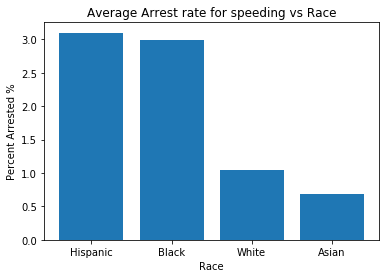

In [54]:
# Calculate the average arrest rate based on race from 2005 to 2015 
hispanicSpeedingTotal = df.loc[(df['driver_race'] == 'Hispanic') & (df['violation_raw'] == 'Speeding')]
hispanicSpeedingArrests = hispanicSpeedingTotal.loc[hispanicSpeedingTotal['is_arrested'] == True]
hispanicArrestRate = round((len(hispanicSpeedingArrests) / len(hispanicSpeedingTotal)) * 100, 2)

blackSpeedingTotal = df.loc[(df['driver_race'] == 'Black') & (df['violation_raw'] == 'Speeding')]
blackSpeedingArrests = blackSpeedingTotal.loc[blackSpeedingTotal['is_arrested'] == True]
blackArrestRate = round((len(blackSpeedingArrests) / len(blackSpeedingTotal)) * 100, 2)

whiteSpeedingTotal = df.loc[(df['driver_race'] == 'White') & (df['violation_raw'] == 'Speeding')]
whiteSpeedingArrests = whiteSpeedingTotal.loc[whiteSpeedingTotal['is_arrested'] == True]
whiteArrestRate = round((len(whiteSpeedingArrests) / len(whiteSpeedingTotal)) * 100, 2)

asianSpeedingTotal = df.loc[(df['driver_race'] == 'Asian') & (df['violation_raw'] == 'Speeding')]
asianSpeedingArrests = asianSpeedingTotal.loc[asianSpeedingTotal['is_arrested'] == True]
asianArrestRate = round((len(asianSpeedingArrests) / len(asianSpeedingTotal)) * 100, 2)

rates = [hispanicArrestRate, blackArrestRate, whiteArrestRate, asianArrestRate]
labels = ['Hispanic', 'Black', 'White', 'Asian']

# Bar chart for data
plt.bar(labels, rates)
plt.xlabel("Race")
plt.ylabel("Percent Arrested %")
plt.title("Average Arrest rate for speeding vs Race")
plt.show()

# How have the arrest rates for speeding violations based on the driver's race changed from 2005 to 2015 in Rhode Island?

In [35]:
# Arrays to arrest rates for each race
whites = []
blacks = []
asians = []
hispanics = []

# Loop through each year from 2005 to 2016
for x in range(2005, 2016, 1):
    whiteTotal = 0
    whiteArrests = 0
    blackTotal = 0
    blackArrests = 0
    asianTotal = 0
    asianArrests = 0
    hispanicTotal = 0
    hispanicArrests = 0
    
    # Loop through each row in the dataset
    for index, row in df.iterrows():
        # Count number of white stops and arrests in the year specified in the outer loop
        if((re.search(str(x), row['stop_date']) != None) & (row['driver_race'] == "White") & (row['violation_raw'] == 'Speeding')):
            whiteTotal = whiteTotal + 1
            if(row['is_arrested'] == True):
                whiteArrests = whiteArrests + 1
        
        # Count number of black stops and arrests in the year specified in the outer loop
        if((re.search(str(x), row['stop_date']) != None) & (row['driver_race'] == "Black") & (row['violation_raw'] == 'Speeding')):
            blackTotal = blackTotal + 1
            if(row['is_arrested'] == True):
                blackArrests = blackArrests + 1
       
        # Count number of asian stops and arrests in the year specified in the outer loop
        if((re.search(str(x), row['stop_date']) != None) & (row['driver_race'] == "Asian") & (row['violation_raw'] == 'Speeding')):
            asianTotal = asianTotal + 1
            if(row['is_arrested'] == True):
                asianArrests = asianArrests + 1
        
        # Count number of hispanic stops and arrests in the year specified in the outer loop
        if((re.search(str(x), row['stop_date']) != None) & (row['driver_race'] == "Hispanic") & (row['violation_raw'] == 'Speeding')):
            hispanicTotal = hispanicTotal + 1
            if(row['is_arrested'] == True):
                hispanicArrests = hispanicArrests + 1
        
    # Add the average arrest rate the specified year to the array of rates for each race
    whites.append((whiteArrests / whiteTotal) * 100)
    blacks.append((blackArrests / blackTotal) * 100)
    asians.append((asianArrests / asianTotal) * 100)
    hispanics.append((hispanicArrests / hispanicTotal) * 100)

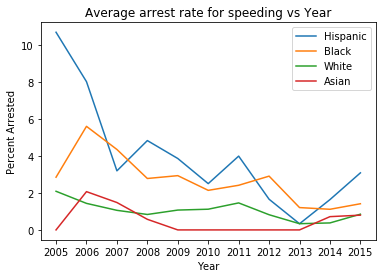

In [55]:
# Years label
years = ['2005','2006','2007','2008','2009','2010','2011','2012','2013','2014','2015']

# Plot the average arrest rates for each race throughout the years
plt.plot(years, hispanics, label = "Hispanic")
plt.plot(years, blacks, label = "Black")
plt.plot(years, whites, label = "White")
plt.plot(years, asians, label = "Asian")

# Labels
plt.xlabel("Year")
plt.ylabel("Percent Arrested")
plt.title("Average arrest rate for speeding vs Year")

plt.legend()
plt.show()